<h2>2019-20 SEASON ANALYSIS</h2>
<p> I'm going to start off by analysing the data for 2019-20 season first as a starting point. Later on I will be adding more previous year analyses to this project.</p>

In [6]:
import numpy as np 
import pandas as pd 

In [7]:
df_1920=pd.read_csv("players_raw1920.csv",index_col="web_name")
df_1920.columns

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'creativity_rank',
       'creativity_rank_type', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'goals_conceded',
       'goals_scored', 'ict_index', 'ict_index_rank', 'ict_index_rank_type',
       'id', 'in_dreamteam', 'influence', 'influence_rank',
       'influence_rank_type', 'minutes', 'news', 'news_added', 'now_cost',
       'own_goals', 'penalties_missed', 'penalties_saved', 'photo',
       'points_per_game', 'red_cards', 'saves', 'second_name',
       'selected_by_percent', 'special', 'squad_number', 'status', 'team',
       'team_code', 'threat', 'threat_rank', 'threat_rank_type',
       'total_points', 'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_

We're trying to maximize our Fantasy points return per fantasy dollar spent. So let's first see the fantasy point returns of each team per fantasy dollar spent. I'm hoping this analysis to bring up high returning teams which are often ignored/dismissed as underdogs because they're not counted among the big clubs.

In [8]:
team_points=df_1920.groupby("team_code")["total_points"].sum()
print(team_points)

team_code
1     1752
3     1580
4     1512
6     1547
7     1357
8     1687
11    1444
13    1816
14    2101
20    1429
21    1433
31    1333
36    1389
39    1655
43    2100
45    1140
49    1594
57    1334
90    1544
91    1265
Name: total_points, dtype: int64


In [9]:
#can be optimized/condensed into smaller code
now_cost=df_1920.groupby("team_code")["now_cost"].sum()
cost_change=df_1920.groupby("team_code")["cost_change_start_fall"].sum()
team_cost=(now_cost-cost_change)/10
print(team_cost)

team_code
1     190.6
3     183.0
4     172.8
6     186.4
7     146.3
8     161.8
11    164.0
13    153.2
14    176.1
20    173.9
21    181.1
31    147.7
36    150.4
39    149.4
43    173.9
45    147.6
49    139.4
57    142.6
90    155.7
91    149.0
dtype: float64


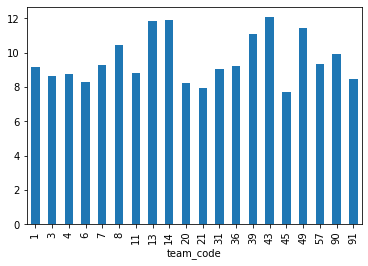

In [10]:
points_per_dollar=team_points/team_cost
#print(points_per_dollar.sort_values(ascending=False))
points_per_dollar.plot(kind="bar")

Here's a list of the team codes:
<li> 3- Arsenal</li>
<li> 7- Aston Villa</li>
<li>91- Bournemouth</li>
<li>36- Brighton</li>
<li>90- Burnley</li>
<li> 8- Chelsea</li>
<li>31- Crystal Palace</li>
<li>11- Everton</li>
<li>13- Leicester</li>
<li>14- Liverpool</li>
<li>43- Man City</li>
<li> 1- Man United</li>
<li> 4- New Castle</li>
<li>45- Norwich</li>
<li>49- Sheffield Utd</li>
<li>20- Southampton</li>
<li> 6- Spurs</li>
<li>57- Watford</li>
<li>21- West Ham</li>
<li>39- Wolves</li>


This data throws up quite interesting observations. Leicester and Sheffield United are among the top 4 clubs in terms of fantasy points earned per dollar spent. So it's quite a no-brainer that players from these squads should be included in our FPL 11. Man United and Tottenham are not so great in terms of fantasy point returns, despite them being popular big names and the average FPL player will definitely include expensive but low returning players from such clubs in their FPL team. Norwich, South Hampton and West Ham are the bottom 3 clubs in terms of their point returns. Norwich finishes last both in terms of point returns per dollar spent as well as in the EPL 19-20 standings.

In [11]:
df_1920["actual_cost"]=(df_1920["now_cost"]-df_1920["cost_change_start_fall"])/10

Having identified teams which yield high returns, now we will be plotting individual player points versus their costs. The goal is to then make an optimal team accounting for both analyses, within a limited 100M budget. Be advised though that this is far from complete, infact right now I'm just doing basic crude analyses. In the coming weeks I will be deep diving further into this data to make deeper analyses.

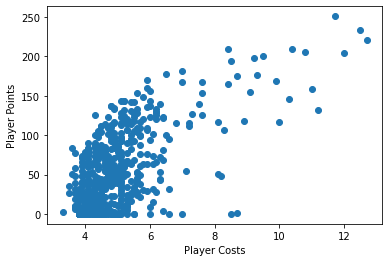

In [12]:
import matplotlib.pyplot as plt

plt.scatter(df_1920["actual_cost"],df_1920["total_points"])
plt.xlabel("Player Costs")
plt.ylabel("Player Points")
plt.show()

Ideally, we are looking for players closest to the upper left corner of the plot, because they will bring in the maximum points with the least investment. However, our team also needs to include some star players, the players in the upper right corner of the plot, because they bring in the maximum points and hence justify their high costs.

Earlier we calculated the points returns per dollar spent at the team level. Now let's calculate it at the individual player level, and see who are the highest returning players and which high costing players are failing to justify their price tag.

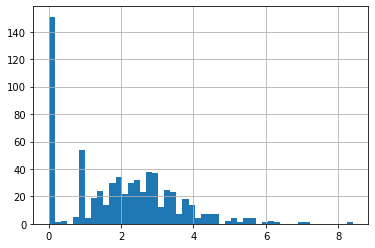

In [13]:
df_1920["points_per_game"].hist(bins=50)

The point frequency distribution plot shows that the vast majority of players will be bringing in 2-4 points. This is a highly unbalanced dataset for an algorithm whose job will be to consistently predict top scoring players each week.

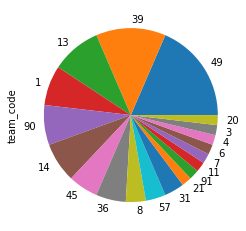

In [14]:
df_1920["player_returns"]=df_1920["total_points"]/df_1920["actual_cost"]
top_players=df_1920[df_1920["player_returns"]>=22]
top_team_counts=top_players["team_code"].value_counts()
top_team_counts.plot(kind="pie")

Sheffield and Wolves turn out to be one of the most effective teams to choose players from to maximize scoring, yet a casual FPL player selecting teams based on his/her personal bias/favouritism is almost guaranteed to overlook these teams. 